In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [2]:
# Load data
file_path = Path("../Resources/loans_data_encoded.csv")
loans_df = pd.read_csv(file_path)
loans_df.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [3]:
# Define features set
X = loans_df.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [4]:
# Define target vector
y = loans_df["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose best learning rate

In [7]:
# Iterate over learning rate to identify the best classifier learning rate
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=5, max_depth=3,
                                            random_state=0)
    # Fit the model
    gb_clf.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        gb_clf.score(X_train_scaled, y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        gb_clf.score(X_test_scaled, y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.789
Accuracy score (validation): 0.496

Learning rate:  0.1
Accuracy score (training): 0.821
Accuracy score (validation): 0.552

Learning rate:  0.25
Accuracy score (training): 0.893
Accuracy score (validation): 0.496

Learning rate:  0.5
Accuracy score (training): 0.947
Accuracy score (validation): 0.520

Learning rate:  0.75
Accuracy score (training): 0.952
Accuracy score (validation): 0.488

Learning rate:  1
Accuracy score (training): 0.955
Accuracy score (validation): 0.512



### Create Gradient Boosting Classifier

In [11]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=200,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
c_matrix = pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

### Evaluate the model

In [15]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
c_report = classification_report(y_test, predictions)

print(c_matrix.head(5))
print("\nAccuracy Score of Gradient Boosting model is: " f'{acc_score}')
print(c_report)

   Prediction  Actual
0           1       1
1           0       0
2           1       1
3           0       0
4           1       0

Accuracy Score of Gradient Boosting model is: 0.52
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        84
           1       0.32      0.41      0.36        41

    accuracy                           0.52       125
   macro avg       0.49      0.49      0.49       125
weighted avg       0.55      0.52      0.53       125



### Visualize the decision tree

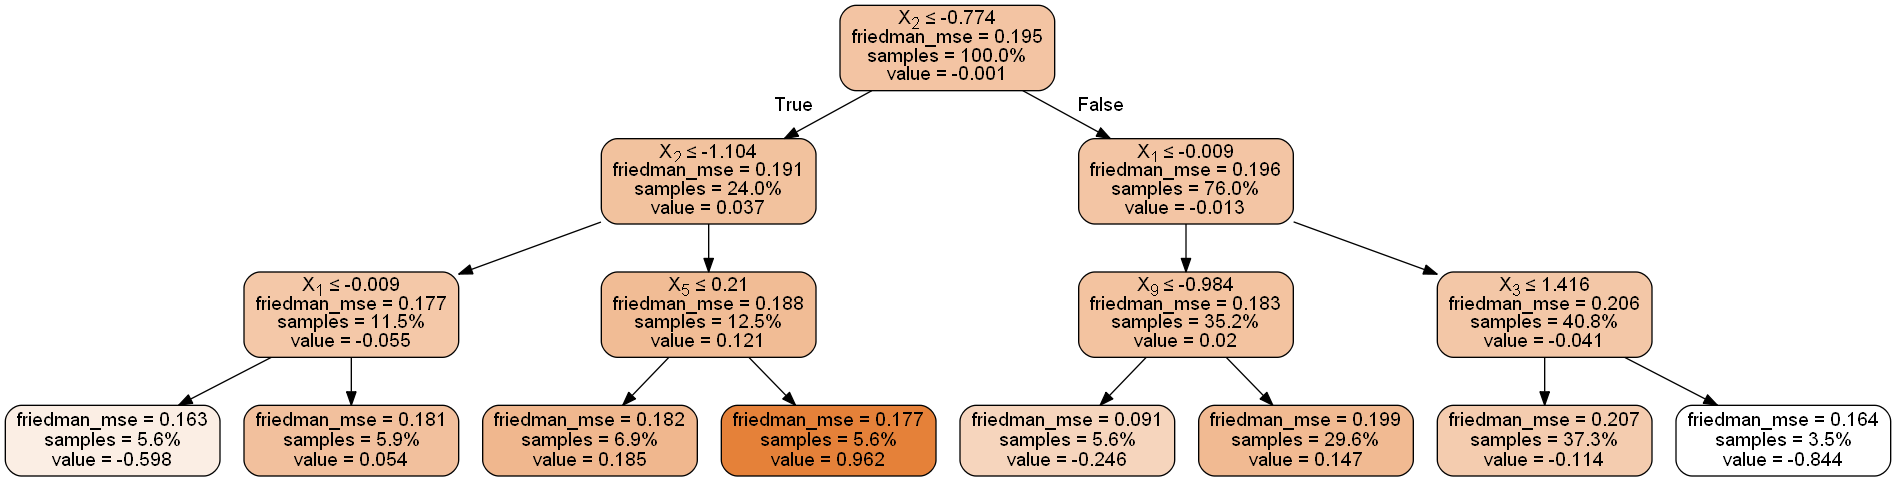

In [16]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())